## Assignment 5, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


## Github Link: https://github.com/pariaighanian/Analysis_of_Complex_Netwroks/blob/main/assignment_05.ipynb

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from infomap import Infomap

In [2]:
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)
twitter_G = nx.read_edgelist('Twitter-Ego/7517222.edges', create_using=nx.DiGraph(), nodetype=int)

## a. Please choose ten nodes from either dataset, and return a SubGraph View of the subgraphs induced on the chosen ten nodes.


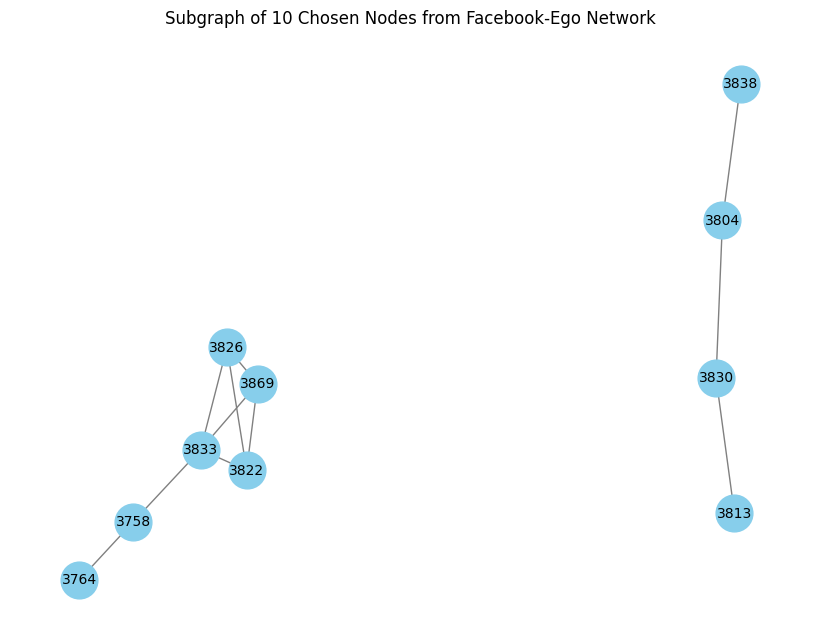

In [3]:
# Randomly choose 10 nodes from the Facebook-Ego network
chosen_nodes = list(facebook_G.nodes())[:10]

# Create a subgraph view for the randomly chosen nodes
subgraph = facebook_G.subgraph(chosen_nodes)

# Plot the subgraph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=10)  # Position nodes using spring layout
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=700, font_size=10)
plt.title("Subgraph of 10 Chosen Nodes from Facebook-Ego Network")
plt.show()


## b. Please list three algorithms for community detection

#### 1. Louvain algorithm
#### 2. Divisive hierarchical clustering (Girvan & Newman)
#### 3. Infomap

## c. Please choose one of the datasets, and utilize all of the algorithms listed in (b) to detect communities in the dataset. Please plot graphs to show the communities (mark nodes with different colors / draw communities unions....).

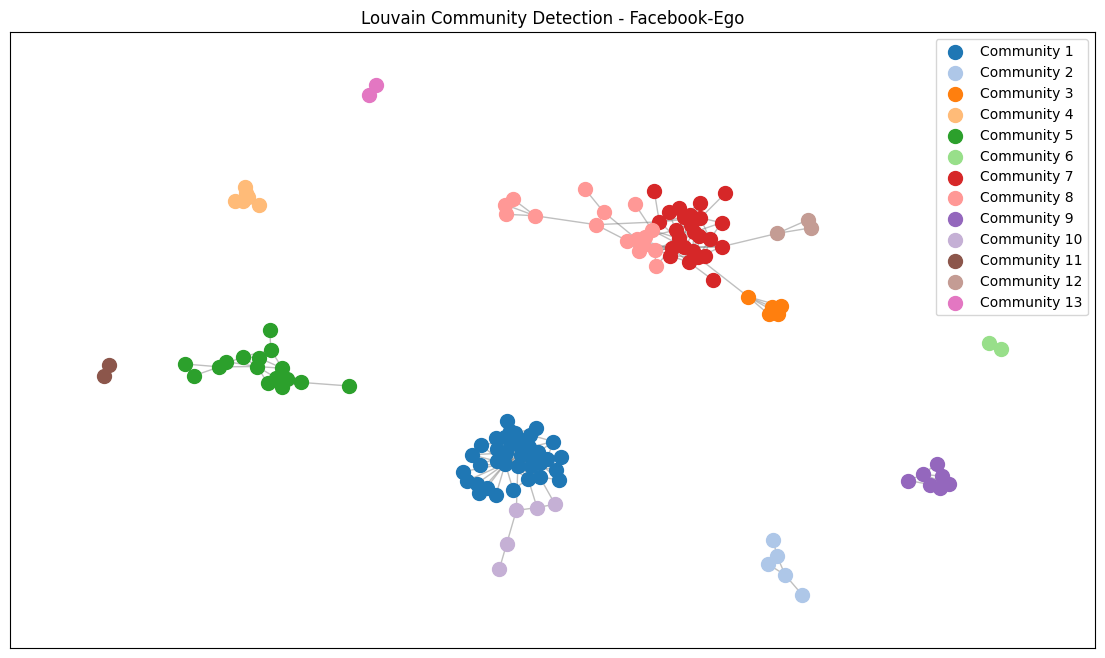

In [20]:
# Louvain Community Detection Algorithm
louvain_communities_list = nx.community.louvain_communities(facebook_G)
# Visualizing the Louvain communities
pos = nx.spring_layout(facebook_G, seed=18)
plt.figure(figsize=(14, 8))

# Color each community differently
colors = plt.get_cmap('tab20')

for i, community in enumerate(louvain_communities_list):
    nx.draw_networkx_nodes(facebook_G, pos, nodelist=list(community), node_color=[colors(i)], label=f"Community {i+1}", node_size=100)

# Draw edges
nx.draw_networkx_edges(facebook_G, pos, alpha=0.5, edge_color="gray")
plt.title("Louvain Community Detection - Facebook-Ego")
plt.legend()
plt.show()

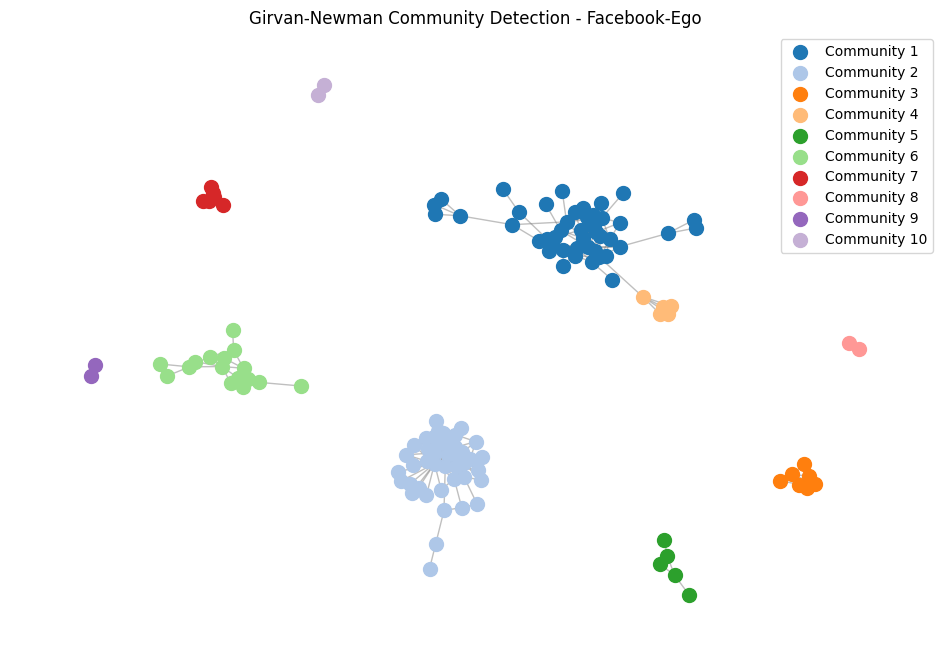

In [21]:
# Detect communities using the Girvan-Newman algorithm
girvan_communities_generator = nx.community.girvan_newman(facebook_G)

# Get the first partition (communities) from the generator
first_partition = next(girvan_communities_generator)

# Visualizing the Girvan-Newman communities
pos = nx.spring_layout(facebook_G, seed=18)  # Fixed layout for consistency
plt.figure(figsize=(12, 8))

# Color each community differently
colors = plt.get_cmap('tab20')

for i, community in enumerate(first_partition):
    nx.draw_networkx_nodes(facebook_G, pos, nodelist=list(community), 
                           node_color=colors(i), label=f"Community {i+1}", 
                           node_size=100)  

# Draw edges
nx.draw_networkx_edges(facebook_G, pos, alpha=0.5, edge_color="gray")
plt.title("Girvan-Newman Community Detection - Facebook-Ego")
plt.legend()
plt.axis('off')  
plt.show()

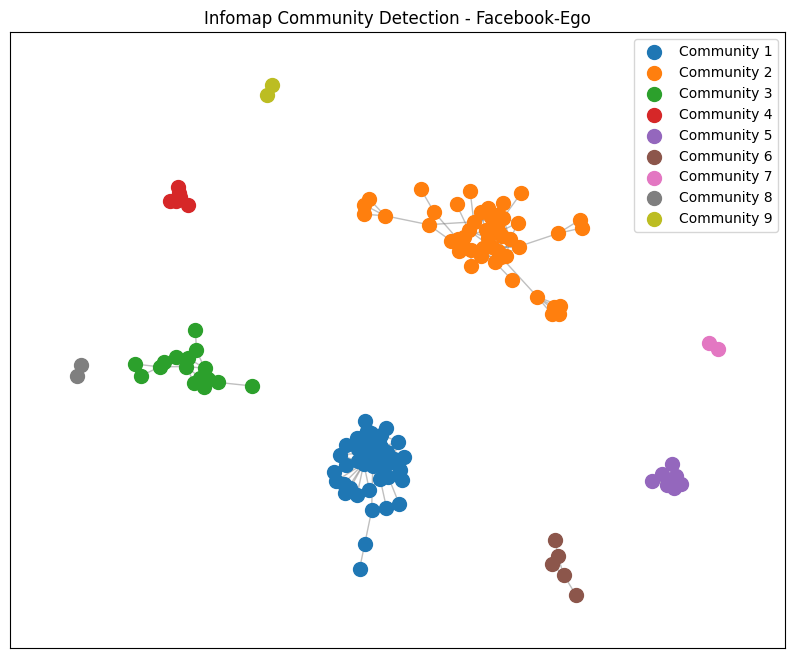

In [22]:
# Initialize Infomap instance
im = Infomap()

# Add edges from the Facebook network into the Infomap object
for edge in facebook_G.edges():
    im.addLink(*edge)

# Run the Infomap algorithm
im.run()

# Get the communities
infomap_communities = {}
for node in im.iterLeafNodes():  # Use iterLeafNodes for proper iteration
    community = node.module_id  # Access the module (community) id
    if community not in infomap_communities:
        infomap_communities[community] = []
    infomap_communities[community].append(node.node_id)  # Use node.node_id for the actual node ID

# Visualize the Infomap communities
pos = nx.spring_layout(facebook_G, seed=18)
plt.figure(figsize=(10, 8))

# Color each community differently
colors = plt.get_cmap('tab10')

for i, (community, nodes) in enumerate(infomap_communities.items()):
    nx.draw_networkx_nodes(facebook_G, pos, nodelist=nodes, node_color=[colors(i)], label=f"Community {i+1}", node_size=100)

# Draw edges
nx.draw_networkx_edges(facebook_G, pos, alpha=0.5, edge_color="gray")
plt.title("Infomap Community Detection - Facebook-Ego")
plt.legend()
plt.show()


## d. What are the differences between the community detection results shown in (c)? What are the possible reasons?


#### The Louvain algorithm optimizes the modularity measure, which quantifies the strength of the division of a network into communities. It uses a hierarchical approach to detect communities. Initially, each node starts as its own community. The algorithm then iteratively merges nodes and communities to maximize modularity. Once no further improvements can be made, it aggregates the nodes in each community into a single node and repeats the process. This hierarchical method allows the Louvain algorithm to efficiently handle large networks, making it a popular choice for community detection.

#### The Girvan-Newman algorithm focuses on edge betweenness centrality. Edge betweenness centrality measures the number of shortest paths that pass through an edge. The algorithm progressively removes edges with the highest betweenness. This process continues until the network breaks down into individual communities. By targeting edges that act as bridges between different parts of the network, the algorithm effectively isolates clusters of nodes that are more densely connected internally.

#### The Infomap algorithm uses information theory and random walks to detect communities. It aims to minimize the description length of a random walker’s path through the network. The algorithm treats the network as a map and seeks to find the most efficient way to describe the path of a random walker. By doing so, it identifies clusters of nodes that the walker tends to visit more frequently. This method effectively captures the flow of information within the network, making it a robust choice for community detection. The Infomap algorithm is particularly useful for networks where the flow of information or movement patterns are important factors.

#### We end up with different numbers of communities using each algorithm: 13 with Louvain, 10 with Girvan-Newman, and 9 with Infomap. Louvain identifies more communities because it focuses on maximizing modularity, capturing finer details. Girvan-Newman removes edges with high betweenness centrality to emphasize important connections, resulting in a moderate count. Infomap, relying on random walks, counts each disconnected subgraph as a separate community, leading to the lowest number overall. 